<a href="https://colab.research.google.com/github/Samgoles/Covid-19-Paper-Rec-Engine./blob/main/Copy_of_topic_modeling_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![workflow](images/topic_workflow.jpg)

# Loading the dataset

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 24 14:07:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
root_path = '/content/drive/MyDrive/BfinalLHL'
metadata_path = f'{root_path}/metadata.csv'
df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
df.head()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,5,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [ ]:
df[) & (~(df.pdf_json_files.isnull()))].count()#source_x.value_counts()

KeyError: ignored

In [ ]:
dfjson=df[~(df.pmc_json_files.isnull()) & (~(df.pdf_json_files.isnull()))]

In [ ]:
dfjsonabs=dfjson.dropna(subset=['abstract', 'title','journal','authors'])


In [ ]:
dfjsonabs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126714 entries, 0 to 599615
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          126714 non-null  object 
 1   sha               126714 non-null  object 
 2   source_x          126714 non-null  object 
 3   title             126714 non-null  object 
 4   doi               126403 non-null  object 
 5   pmcid             126714 non-null  object 
 6   pubmed_id         110963 non-null  object 
 7   license           126714 non-null  object 
 8   abstract          126714 non-null  object 
 9   publish_time      126714 non-null  object 
 10  authors           126714 non-null  object 
 11  journal           126714 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  0 non-null       object 
 14  arxiv_id          106 non-null     object 
 15  pdf_json_files    126714 non-null  object 
 16  pmc_json_files    12

In [ ]:
!pip install langdetect
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(dfjsonabs))):
    # split by space into list, take the first x intex, join with space
    text = dfjsonabs.iloc[ii]['abstract'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(dfjsonabs.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

     |████████████████████████████████| 981 kB 7.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=48597ad810cf3bb03fb90f684deb7e5c9c81c4c09a90153198f92ef947e6a1c5
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


100%|██████████| 126714/126714 [10:23<00:00, 203.15it/s]


In [ ]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 126714

{'af': 2,
 'ca': 2,
 'cy': 1,
 'da': 1,
 'de': 284,
 'en': 126211,
 'es': 34,
 'et': 1,
 'fr': 37,
 'hu': 10,
 'it': 4,
 'nl': 99,
 'no': 1,
 'pt': 4,
 'ro': 3,
 'so': 1,
 'tl': 1,
 'unknown': 16,
 'vi': 2}


In [ ]:
dfjsonabs['language']=languages
dfjsonabs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,language
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,en
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,en
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,en
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,en
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599603,4x5t4c5u,ee024840b40e3086ed1d6feb1134fd7d762edc00,Elsevier; Medline; PMC,COVID-19 paraclinical diagnostic tools: Update...,10.1016/j.retram.2020.06.001,PMC7305905,32576508,no-cc,MOTIVATION: COVID-19 is one of the most widely...,2020-06-20,"Alsuliman, Tamim; Sulaiman, Rand; Ismail, Saws...",Curr Res Transl Med,NaN,NaN,NaN,document_parses/pdf_json/ee024840b40e3086ed1d6...,document_parses/pmc_json/PMC7305905.xml.json,https://doi.org/10.1016/j.retram.2020.06.001; ...,219946477.0,en
599605,euc1a763,c6c5790f2536fd294e8d472c19b1a0b4d89bf223,Medline; PMC,Chronic care treatment for smoking cessation i...,10.1186/s12888-021-03113-5,PMC7886429,33593332,cc-by,BACKGROUND: Rates of smoking among those with ...,2021-02-17,"Busch, Andrew M.; Nederhoff, Dawn M.; Dunsiger...",BMC Psychiatry,NaN,NaN,NaN,document_parses/pdf_json/c6c5790f2536fd294e8d4...,document_parses/pmc_json/PMC7886429.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/33593332/;...,231939973.0,en
599610,o44dtozb,c07b523c9bf9af72f5b6ee8b586b13ef619bb3ca,Medline; PMC,Pharmacological targets in the ubiquitin syste...,10.1017/s1462399411002031,PMC3219211,22088887,cc-by-nc-sa,Recent advances in the development and discove...,2011-11-30,"Edelmann, Mariola J.; Nicholson, Benjamin; Kes...",Expert Rev Mol Med,NaN,NaN,NaN,document_parses/pdf_json/c07b523c9bf9af72f5b6e...,document_parses/pmc_json/PMC3219211.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/22088887/;...,14102550.0,en
599614,liifn5l5,75e0c6f78c22311296ebb0596e1e8a193e1666d0,Medline; PMC,An electrochemical label-free DNA impedimetric...,10.1007/s11696-020-01280-5,PMC7354876,32836707,no-cc,"In this study, a highly se

In [ ]:

dfjsonabs.to_csv('/content/drive/MyDrive/BfinalLHL/dfjsonabs_lan.csv')

In [ ]:
df_jsn_abs_en=dfjsonabs[dfjsonabs['language']=='en']
df_jsn_abs_en=df_jsn_abs_en.dropna(subset=['doi'])

In [ ]:
df_jsn_abs_en.to_csv('/content/drive/MyDrive/BfinalLHL/df_jsn_abs_en.csv')

In [ ]:
df_jsn_abs_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125901 entries, 0 to 599615
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          125901 non-null  object 
 1   sha               125901 non-null  object 
 2   source_x          125901 non-null  object 
 3   title             125901 non-null  object 
 4   doi               125901 non-null  object 
 5   pmcid             125901 non-null  object 
 6   pubmed_id         110585 non-null  object 
 7   license           125901 non-null  object 
 8   abstract          125901 non-null  object 
 9   publish_time      125901 non-null  object 
 10  authors           125901 non-null  object 
 11  journal           125901 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  0 non-null       object 
 14  arxiv_id          106 non-null     object 
 15  pdf_json_files    125901 non-null  object 
 16  pmc_json_files    12

In [ ]:
df_jsn_abs_en.publish_time.unique()

array(['2001-07-04', '2000-08-15', '2000-08-25', ..., '2007-08-20',
       '2010-07-04', '2009-08-09'], dtype=object)

In [ ]:
df_jsn_abs_en['pub_year'] = pd.to_datetime(df_jsn_abs_en['publish_time']).dt.year

In [ ]:
df_jsn_abs_en.pub_year.value_counts()

2020    58230
2021    35867
2019     3930
2018     3115
2017     2875
2016     2823
2015     2567
2014     2387
2013     2091
2012     1854
2011     1659
2010     1544
2009     1432
2008     1215
2007      996
2006      949
2005      867
2004      728
2003      319
2002      112
2001       86
2000       84
1999       82
1998       48
1997       20
1996        9
1983        4
1987        3
1993        1
1992        1
1976        1
1994        1
1988        1
Name: pub_year, dtype: int64

(array([1.00000e+00, 4.00000e+00, 4.00000e+00, 2.00000e+00, 7.80000e+01,
        3.64000e+02, 3.85900e+03, 5.85000e+03, 1.17220e+04, 1.04017e+05]),
 array([1976. , 1980.5, 1985. , 1989.5, 1994. , 1998.5, 2003. , 2007.5,
        2012. , 2016.5, 2021. ]),
 <a list of 10 Patch objects>)

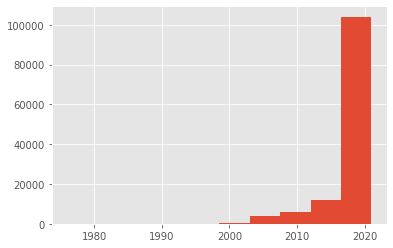

In [ ]:
plt.hist(df_jsn_abs_en.pub_year)

<BarContainer object of 110 artists>

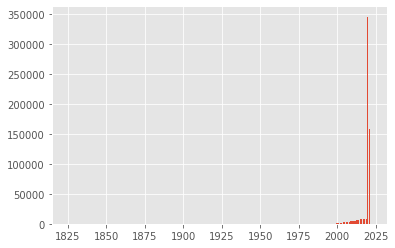

In [ ]:
year=df.pub_year.value_counts().reset_index()[['pub_year','index']]
plt.bar(year['index'],year['pub_year'])

In [ ]:
dfy=df[(df['pub_year']>=2020)]
dfy.shape

(504442, 20)

In [ ]:
dfy0=dfy[(dfy['pub_year']==2020)]
dfy0.shape

(346160, 20)

In [ ]:
dfy1=dfy[(dfy['pub_year']==2021)]
dfy1.shape

(158278, 20)

In [ ]:
dfy1=dfy[(dfy['pub_year']==2022)]
dfy1.shape

(4, 20)

In [ ]:
df.source_x.value_counts()

WHO                                    256089
Medline                                108398
Medline; PMC                           100198
PMC                                     52771
Elsevier; Medline; PMC                  45703
MedRxiv; WHO                            11263
Elsevier; PMC                            7918
ArXiv                                    7654
BioRxiv; WHO                             2700
BioRxiv                                  1647
Medline; PMC; WHO                         926
MedRxiv                                   921
MedRxiv; Medline; PMC; WHO                724
BioRxiv; Medline; PMC; WHO                489
MedRxiv; Medline; WHO                     347
Elsevier                                  334
BioRxiv; Medline; WHO                     316
Elsevier; Medline; PMC; WHO               304
BioRxiv; MedRxiv                          248
Medline; WHO                              219
BioRxiv; MedRxiv; WHO                      73
ArXiv; Medline; PMC               

In [ ]:
dfwho=df[df['source_x']=='WHO']

In [ ]:
dfwho.shape

(256089, 20)

In [ ]:
dfwho.pub_year.value_counts()

2020.0    179849
2021.0     74867
2019.0       203
2018.0       151
2002.0       122
2017.0       107
2006.0       101
2001.0        91
2000.0        68
2010.0        46
2009.0        36
2007.0        34
2011.0        31
2008.0        26
2003.0        21
2005.0        19
1999.0        18
2004.0        16
2015.0        15
2012.0        14
2013.0        12
2016.0        11
2022.0         4
1995.0         2
1998.0         2
1996.0         2
1976.0         1
1993.0         1
Name: pub_year, dtype: int64

# Preprocessing to a numeric representation

#### "Normalizing" the text
We want our topic model to identify interesting and important patterns instead of noise. For that we need to "normalize" our text. Preprocessing is a crucial step when you do topic modeling and it markedly affects the results. For this example, let's use a popular Python NLP library called [spaCy](https://spacy.io/). It is a fast, easy-to-use, industrial-strength, and a powerful library. 

spaCy is a powerful library and it can do many other things, but we'll be using it for preprocessing.  With this library, you can run the NLP pipeline by simply calling the function `nlp`. You can then access information about each token in a `for` loop. 

```
doc = nlp(text)
for token in doc:
    print(token.pos_)
    print(token.lemma_)
```

#### Create word frequency counts
The LDA model finds topics based on word frequencies, so you must use a `CountVectorizer` to create a Bag of Words representation of each document.

In [ ]:
#X=pd.DataFrame(df['abstract'])
X=pd.DataFrame(dfwho['abstract'])

In [ ]:
import re
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [ ]:
nlp = spacy.load("en_core_web_sm")

def normalize_text(documents, 
                   min_token_len=2, 
                   irrelevant_pos=['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']):
    """
    Given text, min_token_len, and irrelevant_pos carry out preprocessing of the text 
    and return a preprocessed string. 
    
    Keyword arguments:
    documents -- (np.array[str]) the list of documents to be preprocessed
    min_token_len -- (int) min_token_length required
    irrelevant_pos -- (list) a list of irrelevant pos tags
    
    Returns: np.array[str] the normalized documents
    """
    normalized_documents = []
    
    for text in documents:
        # Remove Emails
        text = re.sub(r'\S*@\S*\s?', '', text)

        # Remove extra space characters
        text = re.sub(r'\s+', ' ', text)

        # Remove distracting characters
        text = re.sub(r'''[\*\~]+''', "", text)
        # Remove distracting characters
        text = re.sub(r'OBJECTIVE', "", text)
        doc = nlp(text)
        clean_text = []

        for token in doc:
            if (token.is_stop == False # Check if it's not a stopword
                and token.is_alpha # Check if it's an alphanumerics char
                and len(token) > min_token_len # Check if the word meets minimum threshold
                and token.pos_ not in irrelevant_pos): # Check if the POS is in the acceptable POS tags
                lemma = token.lemma_ # Take the lemma of the word
                clean_text.append(lemma)
                
        clean_text = ' '.join(clean_text)
        normalized_documents.append(clean_text)
        
    normalized_documents = np.array(normalized_documents)
    return normalized_documents

# Create a Transformer from the function so that we can use it in a Pipeline
normalizer = FunctionTransformer(normalize_text)

# Show an example of the normalizer in action
#print(f'Prior to normalization:\n{X[0]}')
print(f'After normalization:\n{normalizer.transform(X.iloc[0:3,0])}')

After normalization:
['Backgroundsevere acute respiratory syndrome coronavirus SARS nationwide public health emergency significant impact human life ObjectiveTo develop new simple hematological prognostic index severity state patient observational cross sectional study conduct patient disease age gender severity Covid record complete blood count lactate dehydrogenase measure new index severity iraqi index CSI index predict severity CSI index monocyte lymphocyte absolute count multiply LDH lactate normal reference laboratory range LDH value ResultsMean age patient year majority patient Males patient stage significant difference mean White Blood Cells lymphocyte monocyte different stage disease significant moderate correlation prognostic index stage disease ConclusionsCSI index new simple predictor clinical outcome patient early stage disease'
 'hawke process form self exciting process numerous application include neuroscience seismology terrorism self exciting process simple formulation

In [ ]:
X.iloc[0:3,0]

146318    Backgroundsevere acute respiratory syndrome co...
146348    Hawkes processes are a form of self-exciting p...
146354    Background and Objectives: To date, more than ...
Name: abstract, dtype: object

In [ ]:

X.isnull().sum()/X.isnull().count()*100

abstract    32.123988
dtype: float64

In [ ]:
X.dropna(axis=0,inplace=True)

In [ ]:
X.isnull().sum()/X.isnull().count()*100

abstract    0.0
dtype: float64

In [ ]:
X.isnull().count()

abstract    173823
dtype: int64

In [ ]:
X=pd.DataFrame(X)

In [ ]:
Xclean1=normalizer.transform(X.iloc[:,0])

In [ ]:
pd.DataFrame(Xclean1).to_csv('Bclean.csv')

In [ ]:
compression_opts = dict(method='zip',

                        archive_name='Bclean1.csv') 
pd.DataFrame(Xclean1).to_csv('/content/drive/MyDrive/BfinalLHL/Bclean1.zip',compression= compression_opts)

In [ ]:
X['clean_abs']=Xclean1

In [ ]:
print(df.columns)
df.head(1)
['cord_uid'0, 'sha'1, 'source_x'2, 'title'3, 'doi'4, 'pmcid'5, 'pubmed_id'6,
       'license'7, 'abstract'8, 'publish_time'9, 'authors'10, 'journal'11, 'mag_id'12,
       'who_covidence_id'13, 'arxiv_id'14, 'pdf_json_files'15, 'pmc_json_files'16,
       'url'17, 's2_id'18, 'pub_year'19]

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id', 'pub_year'],
      dtype='object')


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,pub_year
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,2001.0


In [ ]:
Xf=X.reset_index()
Xf

Xf['title']=df.loc[Xf['index'],'title'].reset_index(drop=True)
Xf['publish_time']=df.loc[Xf['index'],'publish_time'].reset_index(drop=True)
Xf['authors']=df.loc[Xf['index'],'authors'].reset_index(drop=True)
Xf['journal']=df.loc[Xf['index'],'journal'].reset_index(drop=True)
Xf['url']=df.loc[Xf['index'],'url'].reset_index(drop=True)
Xf['pdf_json_files']=df.loc[Xf['index'],'pdf_json_files'].reset_index(drop=True)
Xf['pub_year']=df.loc[Xf['index'],'pub_year'].reset_index(drop=True)
Xf['doi']=df.loc[Xf['index'],'doi'].reset_index(drop=True)
  #item['publish_time']=df.iloc[item['index'],9]
  #item['authors']=df.iloc[item['index'],10]
  #item['journal']=df.iloc[item['index'],11]
  #item['url']=df.iloc[item['index'],17]
  #item['pub_year']=df.iloc[item['index'],19]
  #item['pdf_json_files']=df.iloc[item['index'],15]



In [ ]:
item

index                                                   146318
abstract     Backgroundsevere acute respiratory syndrome co...
clean_abs    Backgroundsevere acute respiratory syndrome co...
Name: 0, dtype: object

In [ ]:
Xf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173823 entries, 0 to 173822
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           173823 non-null  int64  
 1   abstract        173823 non-null  object 
 2   clean_abs       173823 non-null  object 
 3   title           173823 non-null  object 
 4   publish_time    173621 non-null  object 
 5   authors         172226 non-null  object 
 6   journal         163355 non-null  object 
 7   url             219 non-null     object 
 8   pdf_json_files  0 non-null       object 
 9   pub_year        173621 non-null  float64
 10  doi             219 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 14.6+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599616 entries, 0 to 599615
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          599616 non-null  object 
 1   sha               199944 non-null  object 
 2   source_x          599616 non-null  object 
 3   title             599314 non-null  object 
 4   doi               321299 non-null  object 
 5   pmcid             209272 non-null  object 
 6   pubmed_id         276662 non-null  object 
 7   license           599616 non-null  object 
 8   abstract          439217 non-null  object 
 9   publish_time      599397 non-null  object 
 10  authors           583994 non-null  object 
 11  journal           560554 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  257510 non-null  object 
 14  arxiv_id          7841 non-null    object 
 15  pdf_json_files    199944 non-null  object 
 16  pmc_json_files    16

In [ ]:
Xfj=Xf[~Xf['journal'].isnull()]

In [ ]:
Xfj['Abs_length']= Xfj['clean_abs'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Xfj['Abs_token']=Xfj['clean_abs'].str.split().apply(len)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
compression_opts = dict(method='zip',

                        archive_name='BXfj.csv') 
pd.DataFrame(Xfj).to_csv('/content/drive/MyDrive/BfinalLHL/Xfj.zip',compression= compression_opts)
compression_opts = dict(method='zip',

                        archive_name='BXf.csv') 
pd.DataFrame(Xf).to_csv('/content/drive/MyDrive/BfinalLHL/Xf.zip',compression= compression_opts)

# Word distribution

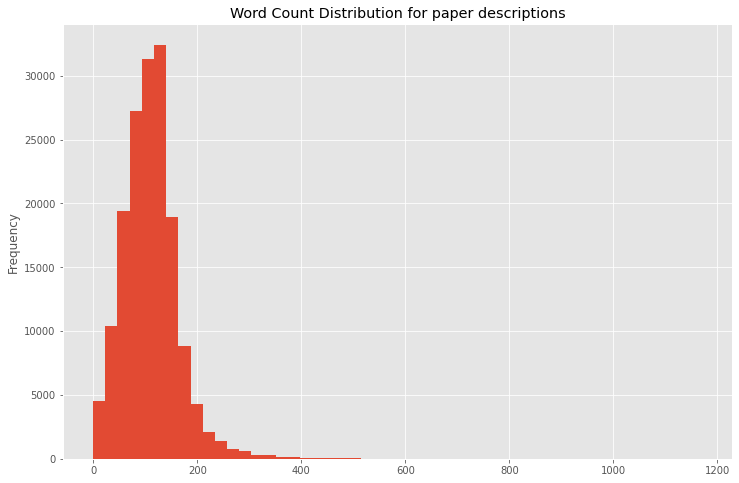

In [ ]:
# Calculating the word count 

Xfj['Abs_token'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for paper descriptions')

In [ ]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('/content/drive/MyDrive/BfinalLHL/Xfj.zip') 
Xfj = pd.read_csv(zf.open('BXfj.csv'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Xf2=Xfj[Xfj.pub_year==2020].iloc[0:150000,:]

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Xf2

,Unnamed: 0,index,abstract,clean_abs,title,publish_time,authors,journal,url,pdf_json_files,pub_year,doi,Abs_length,Abs_token
95490,101815,318241,ABSTRACT Objective: To analyze literature data...,ABSTRACT Objective analyze literature datum un...,Exposure of pediatric emergency patients to im...,2022.0,"Floriani, Isabela Dombeck Borgmann Ariela Vict...","Rev. Paul. Pediatr. (Ed. Port., Online)",NaN,NaN,2022.0,NaN,2523,296
95491,101816,318242,ABSTRACT Objective: To analyze literature data...,ABSTRACT Objective analyze literature datum un...,Exposure of pediatric emergency patients to im...,2022.0,"Floriani, Isabela Dombeck; Borgmann, Ariela Vi...","Rev. Paul. Pediatr. (Ed. Port., Online)",NaN,NaN,2022.0,NaN,1081,130
118859,126601,356028,"COVID-19 is now appreciated as a pandemic, pre...",appreciate pandemic present wide range symptom...,Chapter 41 - Cardiovascular Disease in the COV...,2022.0,"Amin, Ahmad Sadeghipour Parham Chitsazan Mitra",Practical Cardiology (Second Edition),NaN,NaN,2022.0,NaN,382,42
129633,137965,373374,"In the last days of 2019, a new coronavirus wa...",day new coronavirus find Wuhan China patient s...,Chapter 40 - COVID-19 Infection: A Novel Fatal...,2022.0,"Maleki, Majid Norouzi Zeinab Maleki Alireza",Practical Cardiology (Second Edition),NaN,NaN,2022.0,NaN,446,57


In [ ]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(Xfj['abstract'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the papers description", figsize = (15,7), )

KeyboardInterrupt: ignored

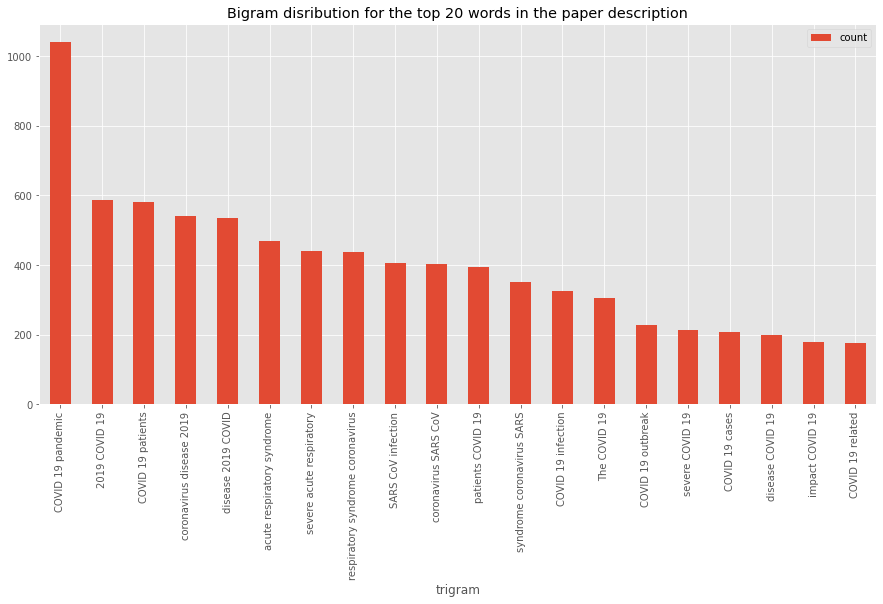

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(Xfj['abstract'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the paper description", figsize = (15,7), )

**Recommendation engine**

We are going to build two recommendation engines using the book title and description.


1.  Convert each book title and description into vectors using TF-IDF and bigram. For more details on TF-IDF 
2.   We are building two recommendation engines, one with a book title and another one with a book description. The model recommends a similar book based on title and description
3.   Calculate the similarity between all the books using cosine similarity.
4.   Define a function that takes book title and genre as an input and returns the top five similar recommended books based on the title and description.



In [ ]:
# Function for recommending papers based on title. It takes paper title as an input.
def recommend(title):
    
    # Matching the genre with the dataset and reset the index
    data = Xf2  
    #data.reset_index(level = 0, inplace = True) 
    #print(data)
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    print(indices)
    #Converting the paper title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(3, 3), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the papers
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar papers 
    sig = sig[1:6]# paper indicies
    ppr_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title']].iloc[ppr_indices]
    print(pd.DataFrame(rec.reset_index(drop=True)))  
    # It reads the top 5 recommend paper url 
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
print(Xf2.title[0])
recommend(Xf2.title[0])

Induction of “cytokine storm” in patients infected with sars-cov-2 and development of COVID-19. Does the gastrointestinal tract any relation in severity?
title
Induction of “cytokine storm” in patients infected with sars-cov-2 and development of COVID-19. Does the gastrointestinal tract any relation in severity?                    0   
A brief overview of current drug repurposing approaches for COVID-19 management                                                                                              1   
Cities and Immigrants: The Local in Anti‐Immigration Federal Policies                                                                                                        2   
Physics-related companies report mostly mild economic symptoms from COVID-19                                                                                                 3   
Food and nutrition security in Addis Ababa, Ethiopia during COVID-19 pandemic: may 2020 report                                  

# Recommand based on Topic description

In [ ]:
def recommend(title):
    
    global rec
    
    data = Xf2[~Xf2.clean_abs.isnull()]
    clnab=Xf2[Xf2['title']==title]['clean_abs'][0]
    print(clnab)
    #data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['clean_abs'])
    print(indices)
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word',  min_df = 5, stop_words='english')#ngram_range=(3, 3)
    tfidf_matrix = tf.fit_transform(data['clean_abs'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[clnab]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the pprs
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
    sig = sig[1:6]# ppr indicies
    ppr_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title', 'abstract']].iloc[ppr_indices ]
    return(rec)

In [ ]:
Xf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 7649
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   index           5000 non-null   int64  
 2   abstract        5000 non-null   object 
 3   clean_abs       4992 non-null   object 
 4   title           5000 non-null   object 
 5   publish_time    5000 non-null   float64
 6   authors         4956 non-null   object 
 7   journal         5000 non-null   object 
 8   url             59 non-null     object 
 9   pdf_json_files  0 non-null      float64
 10  pub_year        5000 non-null   float64
 11  doi             59 non-null     object 
 12  Abs_length      5000 non-null   int64  
 13  Abs_token       5000 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 715.0+ KB


In [ ]:
print(Xf2.title[0])
recommend(Xf2.title[0])

Induction of “cytokine storm” in patients infected with sars-cov-2 and development of COVID-19. Does the gastrointestinal tract any relation in severity?
coronaviruse extensive family virus produce different kind human disease range common cold severe acute respiratory syndrome Coronavirus disease cause SARS zoonotic coronavirus start China December March World Health Organization declare global pandemic disease wide spectrum sign symptom present cough fever result proportion patient develop acute respiratory distress syndrome ARDS argue severe lung involvement virus cause hyperinflammation condition similar hemophagocytic lymphohistiocytosis HLH clinical syndrome cause inadequate response immune system trigger infectious neoplastic metabolic rheumatologic lead disproportionate inflammatory reaction activate immune response produce exaggerated release storm cytokine responsible disease publication suggest presence gastrointestinal symptom associate COVID disease high indicator severity

,title,abstract
4957,Induction of “cytokine storm” in patients infected with sars-cov-2 and development of COVID-19. Does the gastrointestinal tract any relation in severity?/ Inducción de “tormenta de citocinas” en pacientes infectados con sars- cov-2 y desarrollo de covid-19. ¿tiene el tracto gastrointestinal alguna relación en la gravedad?,"Coronaviruses are an extensive family of viruses, some of them can produce different kind of human diseases, ranging from the common cold to severe acute respiratory syndrome. Coronavirus disease (COVID-19) is caused by the SARS-CoV-2 zoonotic coronavirus and started in China in December 2019. In March 2020, the World Health Organization (WHO) declared it a global pandemic. This disease has a wide spectrum of signs and symptoms, predominantly presenting with cough and fever, resulting in a proportion of patients who develop acute respiratory distress syndrome (ARDS). It has been argued that severe lung involvement by the virus may also be caused by hyperinflammation and a condition similar to hemophagocytic lymphohistiocytosis (HLH), which is a clinical syndrome caused by an inadequate response of the immune system to a trigger, whether infectious, neoplastic, metabolic, or rheumatologic, leading to a disproportionate inflammatory reaction. This activated immune response producing an exaggerated release or storm of cytokines responsible for this disease. There are recently publications suggesting that the presence of gastrointestinal symptoms is associated with COVID 19 disease with higher indicators of severity, which motivates the gastroenterologist to explore how the digestive system could impact this hyperinflammation."
4956,Inducción de tormenta de citocinas en pacientes infectados con SARS- CoV-2 y desarrollo de COVID-19: Tiene el tracto gastrointestinal alguna relación en la gravedad?,"Los coronavirus son una extensa familia de virus;algunos pueden ser causa de diversas enfermedades humanas, que van desde el resfriado común hasta el síndrome respiratorio agudo severo La enfermedad por coronavirus (COVID-19) es causada por el coronavirus zoonótico SARS-CoV-2, y comenzó en China en diciembre de 2019 En marzo de 2020, la Organización Mundial de la Salud (OMS) lo declaró una pandemia mundial Esta enfermedad tiene un gran espectro de signos y síntomas, predominantemente se presenta con tos y fiebre, lo que resulta en una proporción de pacientes que desarrollan síndrome de dificultad respiratoria aguda (SDRA) Se ha planteado que la afectación pulmonar grave por el virus puede ser causada también por hiperinflamación y un cuadro similar a la linfohistiocitosis hemofagocítica (HLH), el cual es un síndrome clínico provocado por una respuesta inadecuada del sistema inmunológico a un desencadenante, sea infec-cioso, neoplásico, metabólico o reumatológico, que resulta en una reacción inflamatoria desproporcionada Esta respuesta inmune altamente activada causa una liberación exagerada o tormenta de citocinas respon-sable del cuadro clínico De allí la importancia de revisar el concepto actual y su desenlace en COVID-19 Recientemente se han publicado artículos en los que se sugiere que la presencia de síntomas gastrointesti-nales se ha asociado a COVID 19 con mayores indicadores de gravedad, lo que motiva al gastroenterólogo a explorar cómo el sistema digestivo podría impactar en esta hiperinflamación (AU)Coronaviruses are an extensive family of viruses, some of them can produce different kind of human diseases, ranging from the common cold to severe acute respiratory syndrome Coronavirus disease (COVID-19) is caused by the SARS-CoV-2 zoonotic coronavirus and started in China in December 2019 In March 2020, the World Health Organization (WHO) declared it a global pandemic This disease has a wide spectrum of signs and symptoms, predominantly presenting with cough and fever, resulting in a proportion of patients who develop acute respiratory distress syndrome (ARDS) It has been argued that severe 

In [ ]:
n_features = 500

vectorizer = CountVectorizer(min_df=5, max_df=0.8,ngram_range=(1, 3))#, max_features=n_features)


In [ ]:
#vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(3, 3), min_df = 5, stop_words='english')#

In [ ]:
Xf3=Xfj[Xfj.pub_year==2020].iloc[0:100000,:]


In [ ]:
Xf3

,Unnamed: 0,index,abstract,clean_abs,title,publish_time,authors,journal,url,pdf_json_files,pub_year,doi,Abs_length,Abs_token
0,4,146421,"Coronaviruses are an extensive family of viruses, some of them can produce different kind of human diseases, ranging from the common cold to severe acute respiratory syndrome Coronavirus disease (COVID-19) is caused by the SARS-CoV-2 zoonotic coronavirus and started in China in December 2019 In March 2020, the World Health Organization (WHO) declared it a global pandemic This disease has a wide spectrum of signs and symptoms, predominantly presenting with cough and fever, resulting in a proportion of patients who develop acute respiratory distress syndrome (ARDS) It has been argued that severe lung involvement by the virus may also be caused by hyperinflammation and a condition similar to hemophagocytic lymphohistiocytosis (HLH), which is a clinical syndrome caused by an inadequate response of the immune system to a trigger, whether infectious, neoplastic, metabolic, or rheumatologic, leading to a disproportionate inflammatory reaction This activated immune response producing an exaggerated release or storm of cytokines responsible for this disease There are recently publications suggesting that the presence of gastrointestinal symptoms is associated with COVID 19 disease with higher indicators of severity, which motivates the gastroenterologist to explore how the digestive system could impact this hyperinflammation © 2020 Asociaciones Colombianas de Gastroenterología,",coronaviruse extensive family virus produce different kind human disease range common cold severe acute respiratory syndrome Coronavirus disease cause SARS zoonotic coronavirus start China December March World Health Organization declare global pandemic disease wide spectrum sign symptom present cough fever result proportion patient develop acute respiratory distress syndrome ARDS argue severe lung involvement virus cause hyperinflammation condition similar hemophagocytic lymphohistiocytosis HLH clinical syndrome cause inadequate response immune system trigger infectious neoplastic metabolic rheumatologic lead disproportionate inflammatory reaction activate immune response produce exaggerated release storm cytokine responsible disease publication suggest presence gastrointestinal symptom associate COVID disease high indicator severity motivate gastroenterologist explore digestive system impact hyperinflammation Asociaciones Colombianas Gastroenterología,Induction of “cytokine storm” in patients infected with sars-cov-2 and development of COVID-19. Does the gastrointestinal tract any relation in severity?,2020.0,"Parra-Izquierdo, V.; Flórez-Sarmiento, C.; Romero-Sánchez, C.",Rev. Colomb. Gastroenterol.,https://doi.org/10.22516/25007440.539,NaN,2020.0,10.22516/25007440.539,967,108
1,5,146446,"This brief overview is intended to shed light on the current drug repositioning (also called drug repurposing) in the therapeutics of the novel coronavirus disease which emerged in 2019 (COVID-19) In this sense, the repositioning drugs for new indications can offer a better risk versus-reward trade-off when compared to other drug development strategies, given that it makes use of drugs whose safety profile are already understood Nonetheless, this approach allows healthcare professionals to promptly tackle the disease by investigating readily available drugs against it",brief overview intend shed light current drug reposition call drug repurposing therapeutic novel coronavirus disease emerge sense reposition drug new indication offer well risk reward trade compare drug development strategy give make use drug safety profile understand approach allow healthcare professional tackle disease investigate available drug,A brief overview of current drug repurposing approaches for COVID-19 management,2020.0,"Fonseca Soares Rodrigues, P. da Thomaz D. V.",Traektori&amp;Atilde,https://doi.org/10.22178/pos.57-1,NaN,2020.0,10.22178/pos.57-1,349,46
2,6,146

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
preprocessor = Pipeline([
                         ('vectorizer', vectorizer)])

# Topic Modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import set_config

set_config(display='diagram')

In [ ]:
x2=Xf3[~Xf3.clean_abs.isnull()]
x2

,Unnamed: 0,index,abstract,clean_abs,title,publish_time,authors,journal,url,pdf_json_files,pub_year,doi,Abs_length,Abs_token
0,4,146421,Coronaviruses are an extensive family of virus...,coronaviruse extensive family virus produce di...,Induction of “cytokine storm” in patients infe...,2020.0,"Parra-Izquierdo, V.; Flórez-Sarmiento, C.; Rom...",Rev. Colomb. Gastroenterol.,https://doi.org/10.22516/25007440.539,NaN,2020.0,10.22516/25007440.539,967,108
1,5,146446,This brief overview is intended to shed light ...,brief overview intend shed light current drug ...,A brief overview of current drug repurposing a...,2020.0,"Fonseca Soares Rodrigues, P. da Thomaz D. V.",Traektori&amp;Atilde,https://doi.org/10.22178/pos.57-1,NaN,2020.0,10.22178/pos.57-1,349,46
2,6,146461,Few Americans would guess that from 2014 to 20...,Americans guess Baton Rouge Louisiana Cincinna...,Cities and Immigrants: The Local in Anti‐Immig...,2020.0,"Adelman, Robert M.",City &amp; Community,https://doi.org/10.1111/cico.12493,NaN,2020.0,10.1111/cico.12493,880,115
3,7,146489,Most makers of research tools for physical sci...,maker research tool physical scientist report ...,Physics-related companies report mostly mild e...,2020.0,"Kramer, David",Physics Today,https://doi.org/10.1063/pt.3.4520,NaN,2020.0,10.1063/pt.3.4520,478,61
4,13,146582,We called by telephone a representative sample...,call telephone representative sample household...,"Food and nutrition security in Addis Ababa, Et...",2020.0,"Hirvonen, K.; Abate, G. T.; Brauw, A. de",ESSP Working Paper - Ethiopia Strategy Support...,https://doi.org/10.2499/p15738coll2.133731,NaN,2020.0,10.2499/p15738coll2.133731,586,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150198,159852,406715,The COVID-19 pandemic highlighted the importan...,pandemic highlight importance transparency ope...,Open access in the age of a pandemic,2020.0,"Alemneh, D. G.; Hawamdeh, S.; Chang, H. C.; Ro...",Proc Assoc Inf Sci Technol,NaN,NaN,2020.0,NaN,800,97
150200,159856,406723,Introduction: 29-year-old with common variable...,introduction old common variable immunodeficie...,Complications of Coronavirus in a Patient with...,2020.0,"Urschel, D.; Cardenas-Morales, M.; Hernandez-T...","Annals of Allergy, Asthma and Immunology",NaN,NaN,2020.0,NaN,1427,157
150201,159857,406725,OBJECTIVES: Heightened anxiety among dental he...,heighten anxiety dental healthcare professiona...,Risk for dental healthcare professionals durin...,2020.0,"Ren, Yanfang; Feng, Changyong; Rasubala, Linda...",J Dent,NaN,NaN,2020.0,NaN,1162,150
150205,159861,406731,BACKGROUND: COVID-19 is a public health emerge...,BACKGROUND public health emergency spread affe...,The Role of Methylprednisolone on Preventing D...,2020.0,"Yang, R.; Xiong, Y.; Ke, H.; Chen, T.; Gao, S.",Eur J Clin Invest,NaN,NaN,2020.0,NaN,1139,136


In [ ]:
x=Xf3[~Xf3.clean_abs.isnull()]['clean_abs']
n_topics = 20


lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=5
                                ,
                                learning_method='online',
                                random_state=8,
                                )

pipeline = Pipeline([('preprocessor', preprocessor), 
                     ('model', lda)])
pipeline.fit(x)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('vectorizer',
                                  CountVectorizer(max_df=0.8, min_df=5,
                                                  ngram_range=(1, 3)))])),
                ('model',
                 LatentDirichletAllocation(learning_method='online', max_iter=5,
                                           n_components=20, random_state=8))])

In [ ]:
# Let's what the predictions look like for a datapoint.
# As discussed, we should get a probability distribution over n_topics
XX=pipeline.transform(x)

In [ ]:
xl=XX.tolist()

In [ ]:
Xseg=Xf3[~Xf3.clean_abs.isnull()]
#Xseg['LDA']=xl
Xseg

,Unnamed: 0,index,abstract,clean_abs,title,publish_time,authors,journal,url,pdf_json_files,pub_year,doi,Abs_length,Abs_token
0,4,146421,Coronaviruses are an extensive family of virus...,coronaviruse extensive family virus produce di...,Induction of “cytokine storm” in patients infe...,2020.0,"Parra-Izquierdo, V.; Flórez-Sarmiento, C.; Rom...",Rev. Colomb. Gastroenterol.,https://doi.org/10.22516/25007440.539,NaN,2020.0,10.22516/25007440.539,967,108
1,5,146446,This brief overview is intended to shed light ...,brief overview intend shed light current drug ...,A brief overview of current drug repurposing a...,2020.0,"Fonseca Soares Rodrigues, P. da Thomaz D. V.",Traektori&amp;Atilde,https://doi.org/10.22178/pos.57-1,NaN,2020.0,10.22178/pos.57-1,349,46
2,6,146461,Few Americans would guess that from 2014 to 20...,Americans guess Baton Rouge Louisiana Cincinna...,Cities and Immigrants: The Local in Anti‐Immig...,2020.0,"Adelman, Robert M.",City &amp; Community,https://doi.org/10.1111/cico.12493,NaN,2020.0,10.1111/cico.12493,880,115
3,7,146489,Most makers of research tools for physical sci...,maker research tool physical scientist report ...,Physics-related companies report mostly mild e...,2020.0,"Kramer, David",Physics Today,https://doi.org/10.1063/pt.3.4520,NaN,2020.0,10.1063/pt.3.4520,478,61
4,13,146582,We called by telephone a representative sample...,call telephone representative sample household...,"Food and nutrition security in Addis Ababa, Et...",2020.0,"Hirvonen, K.; Abate, G. T.; Brauw, A. de",ESSP Working Paper - Ethiopia Strategy Support...,https://doi.org/10.2499/p15738coll2.133731,NaN,2020.0,10.2499/p15738coll2.133731,586,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150198,159852,406715,The COVID-19 pandemic highlighted the importan...,pandemic highlight importance transparency ope...,Open access in the age of a pandemic,2020.0,"Alemneh, D. G.; Hawamdeh, S.; Chang, H. C.; Ro...",Proc Assoc Inf Sci Technol,NaN,NaN,2020.0,NaN,800,97
150200,159856,406723,Introduction: 29-year-old with common variable...,introduction old common variable immunodeficie...,Complications of Coronavirus in a Patient with...,2020.0,"Urschel, D.; Cardenas-Morales, M.; Hernandez-T...","Annals of Allergy, Asthma and Immunology",NaN,NaN,2020.0,NaN,1427,157
150201,159857,406725,OBJECTIVES: Heightened anxiety among dental he...,heighten anxiety dental healthcare professiona...,Risk for dental healthcare professionals durin...,2020.0,"Ren, Yanfang; Feng, Changyong; Rasubala, Linda...",J Dent,NaN,NaN,2020.0,NaN,1162,150
150205,159861,406731,BACKGROUND: COVID-19 is a public health emerge...,BACKGROUND public health emergency spread affe...,The Role of Methylprednisolone on Preventing D...,2020.0,"Yang, R.; Xiong, Y.; Ke, H.; Chen, T.; Gao, S.",Eur J Clin Invest,NaN,NaN,2020.0,NaN,1139,136


In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaa',
 'aaaai',
 'aaas',
 'aac',
 'aachen',
 'aacn',
 'aacr',
 'aad',
 'aalborg',
 'aamc',
 'aan',
 'aao',
 'aap',
 'aarogya',
 'aarogya setu',
 'aas',
 'aasld',
 'aat',
 'aav',
 'aba',
 'ababa',
 'ababa ethiopia',
 'abacavir',
 'abaixo',
 'abandon',
 'abandonment',
 'abarcar',
 'abastecimento',
 'abate',
 'abatement',
 'abattoir',
 'abbas',
 'abbas iran',
 'abbott',
 'abbott architect',
 'abbott architect sars',
 'abbott assay',
 'abbott diasorin',
 'abbott euroimmun',
 'abbott igg',
 'abbott igg assay',
 'abbott laboratories',
 'abbott sars',
 'abbott sars igg',
 'abbreviate',
 'abbreviated',
 'abbreviation',
 'abbreviation angiotensin',
 'abbreviations',
 'abc',
 'abcd',
 'abdicate',
 'abdoman',
 'abdoman pelvi',
 'abdoman show',
 'abdomen',
 'abdomen pelvi',
 'abdominal',
 'abdominal abscess',
 'abdominal aorta',
 'abdominal aortic',
 'abdominal aortic aneurysm',
 'abdominal cavity',
 'abdominal complaint',
 'abdominal complication',
 'abdominal computed',
 'abdominal comp

In [ ]:
# Gets a list of API Calls to make (will be joined back up later)
def get_request(doi): 
    return f"https://api.altmetric.com/v1/doi/{doi}"
    
calls = data['doi'].apply(lambda doi: f"https://api.altmetric.com/v1/doi/10.22516/25007440.539").to_frame()
calls['cord_uid'] = data['cord_uid']  
calls.to_csv('altmetric_calls.csv', index=False)
del calls

INC_THRESH = 0.5
cited_by = ['score', 'cord_uid', 'patents', 'posts', 'wikipedia', 'feeds', 'msm', 'tweeters', 'policies', 'accounts']
# Reads the impact data generated from alt metric to a file
impact = pd.read_csv('/kaggle/input/impact-data/impact_upload.csv')

# Selects the dat that I want from this
impact = impact[['score', 'cord_uid', 'patents', 'posts', 'wikipedia', 'feeds', 'msm', 'tweeters', 'policies', 'accounts']].fillna(0) # The impact is zero is there is no data!
impact.head()



# Explore topics

After fitting LDA, we need to do some work to try and understand
what the fitted topics represent. 

One way to do this is to find out which are the most important words per topic. For this, we can look at the `lda.components_`
attribute, which is a `float` matrix of shape `(n_topics, n_words)` signifying each word's importance to a given topic.

We can also do this visualization with the convenient `pyLDAvis` package, which will also show us a low-dimensional representation of the topics so that we can see their relative similarities.

In [ ]:
from matplotlib import pyplot as plt
!pip install pyLDAvis
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.7 MB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=87010de0da9256ce16f7a7be9f13b395da374d8c0ce51525ac9ec33b01f2f9e7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


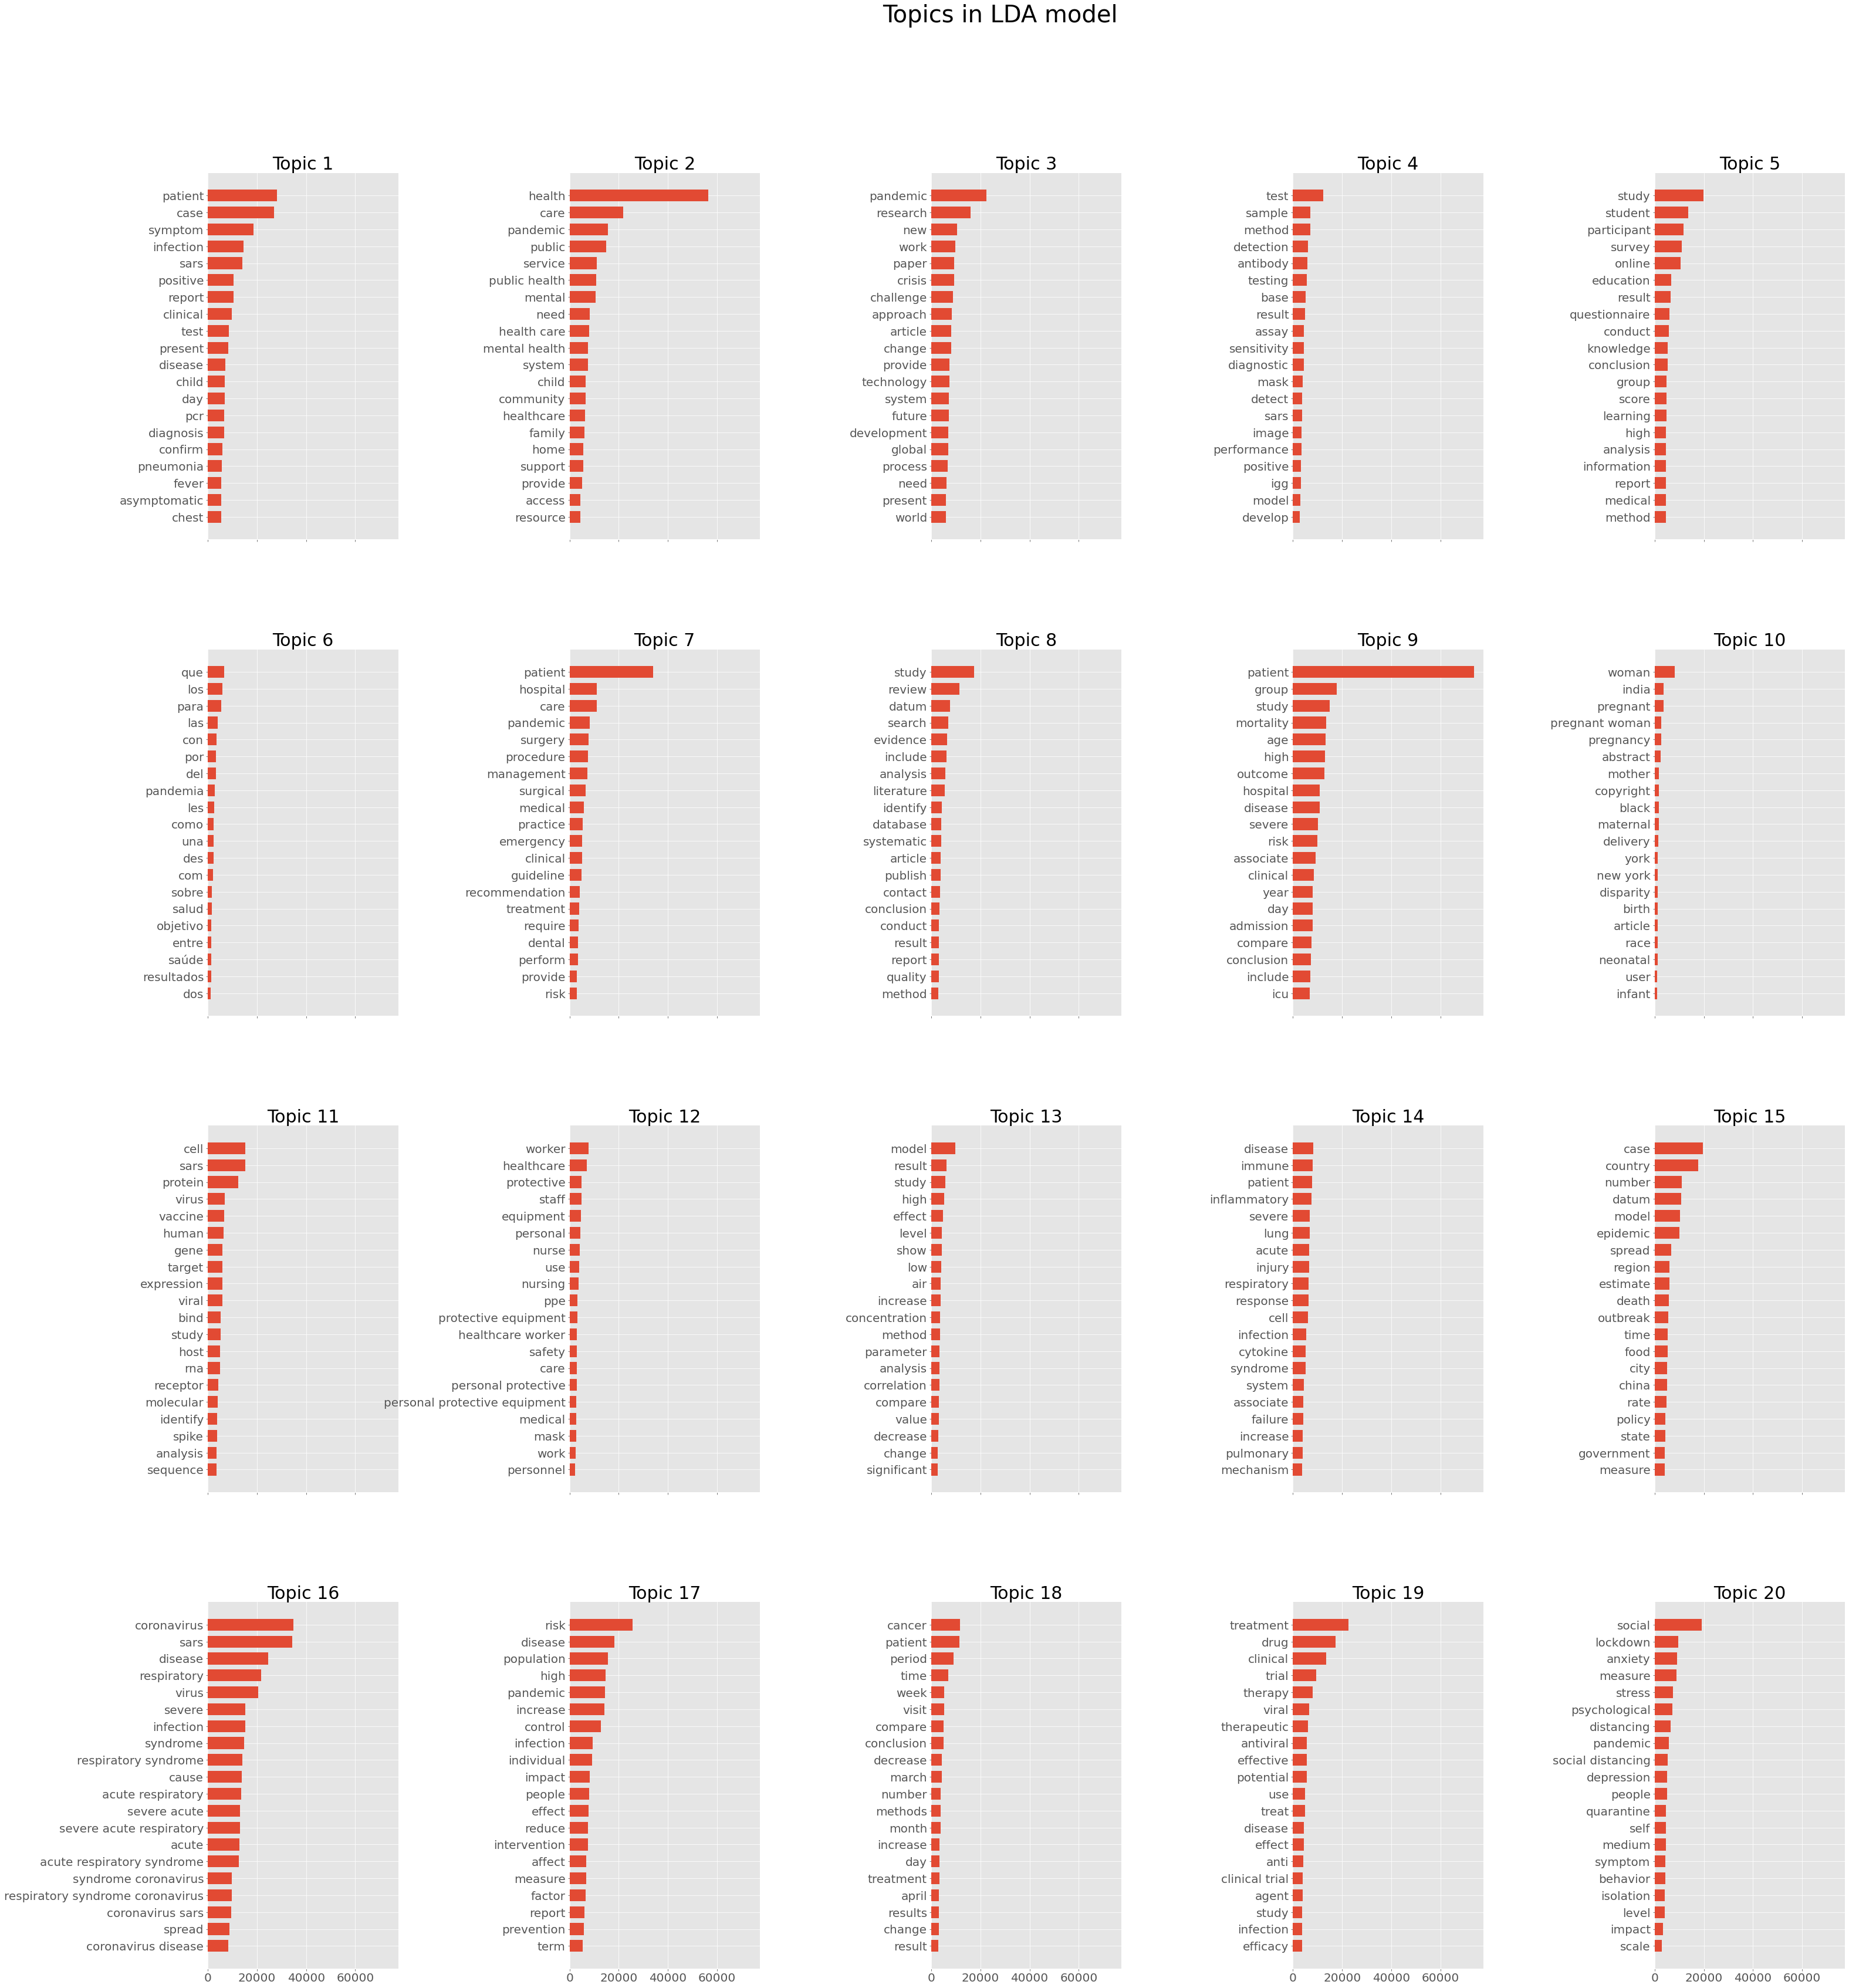

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(50, 50), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    
plot_top_words(lda, vectorizer.get_feature_names(), 20, 'Topics in LDA model')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NotFittedError: ignored

In [ ]:
data_vectorized = preprocessor.transform(x)
vis = pyLDAvis.sklearn.prepare(lda, data_vectorized, vectorizer, mds='tsne')
vis

NameError: ignored

In [ ]:
Xseg['LDA']

0        [0.00037878787957093465, 0.2497454995005064, 0.0003787878831152429, 0.0003787878799679384, 0.00037878788680995783, 0.00037878788798725627, 0.00037878788572590734, 0.00037878788061292113, 0.00037878788125302916, 0.00037878788344447047, 0.0003787878842909131, 0.0003787878842036473, 0.03116829606368577, 0.0003787878825282759, 0.0003787878824923879, 0.03293531109586039, 0.3268541595321506, 0.0003787878867590973, 0.00037878788698897034, 0.3536149155520459] 
1        [0.0009803921586934005, 0.0009803921847671186, 0.0009803921809227712, 0.000980392163251779, 0.0009803921664405606, 0.2934802034827465, 0.0009803921625650943, 0.042140593160375814, 0.0612563308687142, 0.0009803921707099456, 0.2515365040714439, 0.0009803921626345064, 0.08295321869781024, 0.0009803921679308613, 0.0009803921765225874, 0.000980392180839781, 0.0009803921719223833, 0.000980392161358952, 0.000980392171807315, 0.2549076593385422]               
2        [0.00029940119878181087, 0.0002994011987697703, 0.000299401

In [ ]:
def recommend(title):
    
    global rec
    
    data =Xseg.iloc[0:20000,:]
    LDA=data[data['title']==title]['LDA'][0]
    print(LDA)
    #data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['LDA'])
    #print(indices)
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(data['LDA'].nparray(), data['LDA'])
    
    # Get the index corresponding to original_title
       
    idx = indices[LDA]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the pprs
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
    sig = sig[1:6]# ppr indicies
    ppr_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title','abstract',"LDA"]].iloc[ppr_indices ]
    return(rec)

In [ ]:
XX.shape

(99815, 8)

In [ ]:
def recommend(title):
    
    global rec
    
    data =Xseg#.iloc[0:10000,:]
    indt=data[data['title']==title].index[0]
    #print(indt)
    #data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    #print(indices)
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(XX[indt,:], XX.T)
    #print(sg.shape)
    # Get the index corresponding to original_title
       
      
     # Get the pairwsie similarity scores 
    sig = list(enumerate(sg))# Sort the pprs
    print(sig)
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar pprs
    sig = sig[1:6]# ppr indicies
    ppr_indices = [i[0] for i in sig]
   
    # Top 5 pprs recommendation
    rec = data[['title','abstract']].iloc[ppr_indices ]
    return(rec['title'])

In [ ]:
Xseg['title'][10]

'Perception of the state of emergency due to COVID-19 by medical students and staff in a Kazakhstani University'

In [ ]:
pd.set_option('display.max_colwidth',-1)
recommend(Xseg['title'][10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


NameError: ignored